# CA3  Capstone Project - Fina
# Name: Denisse Garcia
# Student ID: SBS24050

## Libraries and dependencies

In [ ]:
#Dependencies
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scipy.sparse import hstack, csr_matrix
import warnings
warnings.filterwarnings("ignore")

## 1. Data Understanding 

In [1]:
# Import required libraries
import pandas as pd

# Load dataset
df = pd.read_csv('customer_support_tickets.csv')

# Preview the dataset
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [2]:
# Checking the Dimensions
df.shape

(8469, 17)

## 2. Inspect Dataset Structure

In [3]:
# Get a summary of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# View basic statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [4]:
# Summary statistics
df.describe(include='all')

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469,8469,8469.000000,8469,8469,8469,8469,8469,8469,8469,2769,8469,8469,5650,2769,2769.000000
unique,NaN,8028,8320,NaN,3,42,730,5,16,8077,3,2769,4,4,5470,2728,NaN
top,NaN,Michael Garcia,bsmith@example.com,NaN,Male,Canon EOS,2020-10-21,Refund request,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,Case maybe show recently my computer follow.,Medium,Email,2023-06-01 15:21:42,2023-06-01 17:14:42,NaN
freq,NaN,5,4,NaN,2896,240,24,1752,576,25,2881,1,2192,2143,3,3,NaN
mean,4235.000000,NaN,NaN,44.026804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.991333
std,2444.934048,NaN,NaN,15.296112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.407016
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2118.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,4235.000000,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,6352.000000,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


### Descriptive Statistics:
- Customer ages range from 18 to 99.
- The most frequent ticket channel is email.
- The mean customer satisfaction rating is approximately 3 out of 5.

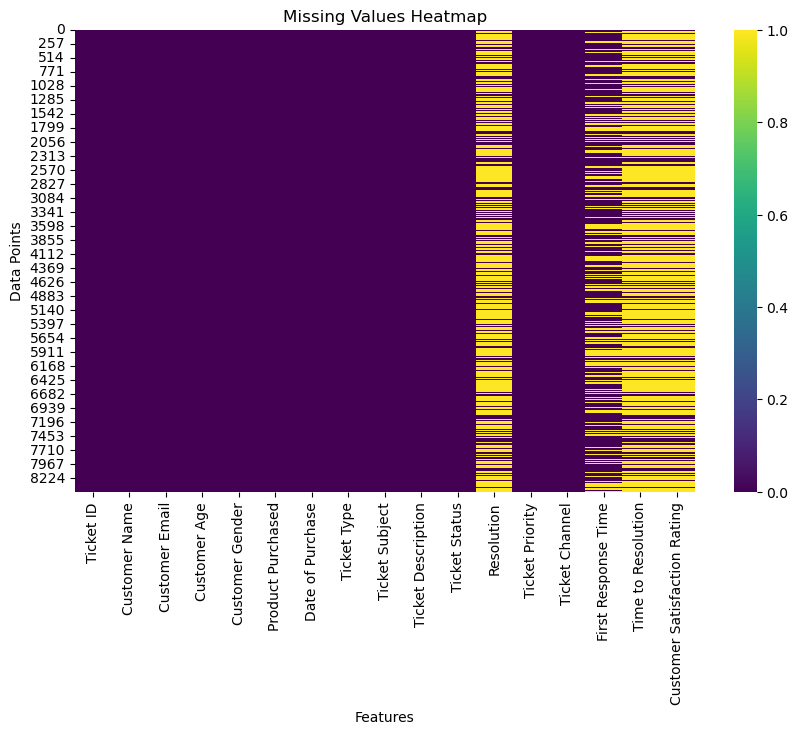

Number of missing values per column:
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = df.isnull()

# Plotting missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

# Print the number of missing values for each column
missing_count = df.isnull().sum()
print("Number of missing values per column:")
print(missing_count)

*It can be seen that Resolution, First Response Time, Time to Resolution and Customer Satisfaction Rating has missing values there.**

**The columns are showing values as missing because there are Nan values in those samples, Later we will impute them with suitable values**
For Customer Satisfaction Rating, consider imputation.

In [7]:
# General overview of all numeric features

df.describe()


,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


## 3. Convert Date & time Columns

In [8]:
print(df.columns.tolist())

['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']


In [9]:
# Convert time columns to datetime
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

# Create Response Time Features
df['Response_Hour'] = df['First Response Time'].dt.hour
df['Response_DayOfWeek'] = df['First Response Time'].dt.dayofweek
df['Response_Month'] = df['First Response Time'].dt.month

# Calculate Resolution Time in hours
df['Resolution_Time_Hours'] = (
    (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600
)

# Optional: Remove unrealistic or negative resolution times
df_cleaned = df[df['Resolution_Time_Hours'] >= 0]

# Display the first few rows with the new columns
df_cleaned[['First Response Time', 'Time to Resolution', 'Response_Hour', 
            'Response_DayOfWeek', 'Response_Month', 'Resolution_Time_Hours']].head()

,First Response Time,Time to Resolution,Response_Hour,Response_DayOfWeek,Response_Month,Resolution_Time_Hours
2,2023-06-01 11:14:38,2023-06-01 18:05:38,11.0,3.0,6.0,6.850000
4,2023-06-01 00:12:42,2023-06-01 19:53:42,0.0,3.0,6.0,19.683333
19,2023-06-01 00:46:04,2023-06-01 20:29:04,0.0,3.0,6.0,19.716667
28,2023-05-31 23:17:17,2023-06-01 06:03:17,23.0,2.0,5.0,6.766667
29,2023-06-01 00:54:17,2023-06-01 18:23:17,0.0,3.0,6.0,17.483333


In [10]:
# Continue data preparation with the additional required columns

# Ensure you're working with a safe copy
df_cleaned = df_cleaned.copy()

# Encode Ticket Channel
df_cleaned['Ticket_Channel'] = df_cleaned['Ticket Channel'].astype('category')
df_cleaned['Channel_Code'] = df_cleaned['Ticket_Channel'].cat.codes

# Encode Ticket Priority
df_cleaned['Ticket_Priority'] = df_cleaned['Ticket Priority'].astype('category')
df_cleaned['Priority_Code'] = df_cleaned['Ticket_Priority'].cat.codes

# Encode Ticket Type
df_cleaned['Ticket_Type'] = df_cleaned['Ticket Type'].astype('category')
df_cleaned['Type_Code'] = df_cleaned['Ticket_Type'].cat.codes

# Encode Customer Gender
df_cleaned['Customer_Gender'] = df_cleaned['Customer Gender'].astype('category')
df_cleaned['Gender_Code'] = df_cleaned['Customer_Gender'].cat.codes

# Filter rows with satisfaction scores and create binary target
df_cleaned = df_cleaned[df_cleaned['Customer Satisfaction Rating'].notnull()].copy()
df_cleaned['Satisfaction_Level'] = df_cleaned['Customer Satisfaction Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Final dataset for modeling and EDA
prepared_df = df_cleaned[[
    'Customer Satisfaction Rating', 'Satisfaction_Level',
    'Ticket_Channel', 'Channel_Code',
    'Ticket_Priority', 'Priority_Code',
    'Ticket_Type', 'Type_Code',
    'Customer_Gender', 'Gender_Code',
    'Customer Age',
    'Resolution_Time_Hours',
    'Response_Hour', 'Response_DayOfWeek', 'Response_Month'
]]


In [11]:

# View the cleaned dataset
prepared_df.head()

,Customer Satisfaction Rating,Satisfaction_Level,Ticket_Channel,Channel_Code,Ticket_Priority,Priority_Code,Ticket_Type,Type_Code,Customer_Gender,Gender_Code,Customer Age,Resolution_Time_Hours,Response_Hour,Response_DayOfWeek,Response_Month
2,3.0,0,Social media,3,Low,2,Technical issue,4,Other,2,48,6.850000,11.0,3.0,6.0
4,1.0,0,Email,1,Low,2,Billing inquiry,0,Female,0,67,19.683333,0.0,3.0,6.0
19,5.0,1,Chat,0,Low,2,Refund request,3,Female,0,39,19.716667,0.0,3.0,6.0
28,5.0,1,Phone,2,Critical,0,Technical issue,4,Other,2,30,6.766667,23.0,2.0,5.0
29,1.0,0,Phone,2,Medium,3,Cancellation request,1,Male,1,67,17.483333,0.0,3.0,6.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   object        
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   object        
 11  Resolution                    

## 3. Descriptive Statistics

Descriptive statistics were used to summarize and explore the core characteristics of the dataset. These included:

- Central tendency measures (mean, median)
- Frequency counts of categorical features
- Distributions of satisfaction ratings and response/resolution times
- Breakdown of ticket volume by channel and priority

This helped uncover patterns in user behavior and service performance that informed model design and business recommendations.

In [13]:
# Summary statistics for numeric features
prepared_df.describe()


,Customer Satisfaction Rating,Satisfaction_Level,Channel_Code,Priority_Code,Type_Code,Gender_Code,Customer Age,Resolution_Time_Hours,Response_Hour,Response_DayOfWeek,Response_Month
count,1404.00000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000
mean,3.02849,0.408120,1.475783,1.457265,2.073362,0.945869,44.149573,7.577932,8.423077,2.943732,5.943732
std,1.40025,0.491661,1.118807,1.125875,1.431108,0.808845,15.218639,5.596637,6.477368,0.230520,0.230520
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,2.000000,5.000000
25%,2.00000,0.000000,0.000000,0.000000,1.000000,0.000000,31.000000,3.000000,3.000000,3.000000,6.000000
50%,3.00000,0.000000,1.000000,1.000000,2.000000,1.000000,44.000000,6.341667,7.000000,3.000000,6.000000
75%,4.00000,1.000000,2.000000,2.000000,3.000000,2.000000,57.000000,11.354167,13.000000,3.000000,6.000000
max,5.00000,1.000000,3.000000,3.000000,4.000000,2.000000,70.000000,23.466667,23.000000,3.000000,6.000000


### Satisfaction Score Distribution

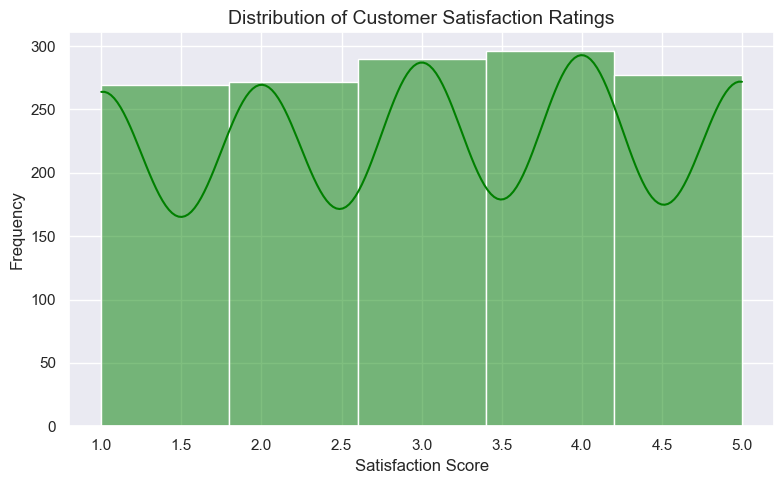

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a different aesthetic style and color palette
sns.set(style="darkgrid", palette="Set2")

# Plot 1: Distribution of Customer Satisfaction Ratings
plt.figure(figsize=(8, 5))
sns.histplot(prepared_df['Customer Satisfaction Rating'], bins=5, kde=True, color='green')
plt.title('Distribution of Customer Satisfaction Ratings', fontsize=14)
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


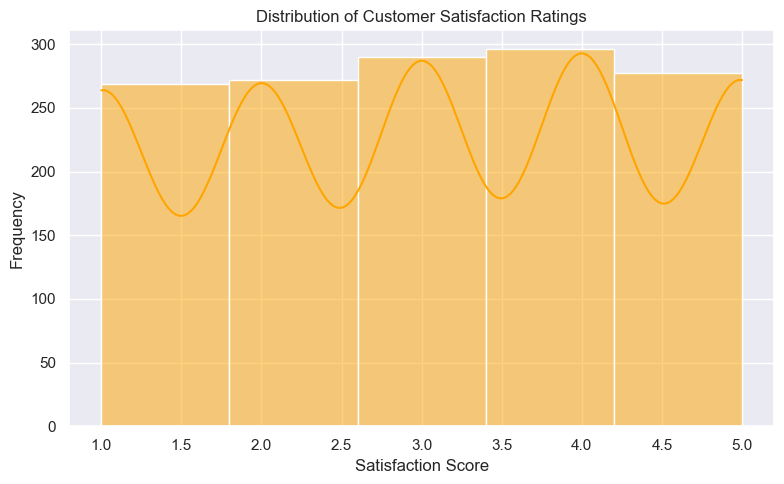

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(prepared_df['Customer Satisfaction Rating'], bins=5, kde=True, color='orange')
plt.title('Distribution of Customer Satisfaction Ratings')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Satisfaction by Support Channel

C:\Users\degarcia\AppData\Local\Temp\ipykernel_24408\683745281.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_group = prepared_df.groupby('Ticket_Channel')['Customer Satisfaction Rating'].mean().sort_values()
C:\Users\degarcia\AppData\Local\Temp\ipykernel_24408\683745281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_group.values, y=channel_group.index, palette="Blues")


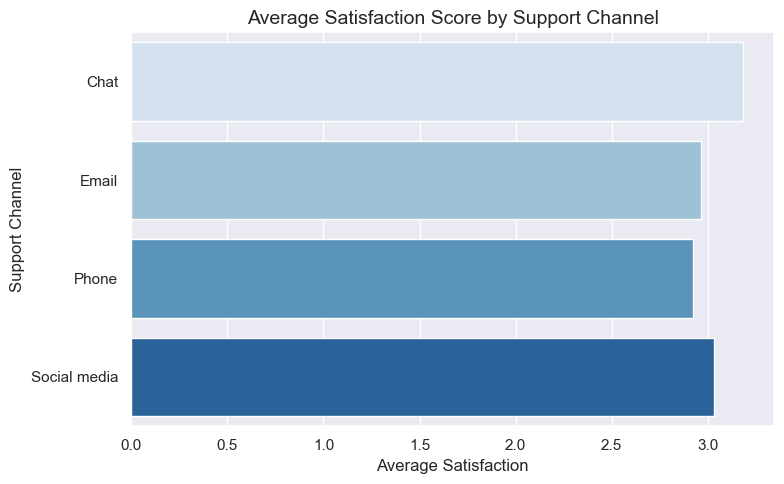

In [15]:
# Plot 2: Average Satisfaction Score by Support Channel
plt.figure(figsize=(8, 5))
channel_group = prepared_df.groupby('Ticket_Channel')['Customer Satisfaction Rating'].mean().sort_values()
sns.barplot(x=channel_group.values, y=channel_group.index, palette="Blues")
plt.title('Average Satisfaction Score by Support Channel', fontsize=14)
plt.xlabel('Average Satisfaction')
plt.ylabel('Support Channel')
plt.tight_layout()
plt.show()


### Ticket Volume by Channel and Priority

C:\Users\degarcia\AppData\Local\Temp\ipykernel_24408\2848711189.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ticket_Channel', data=prepared_df, palette="Set3")


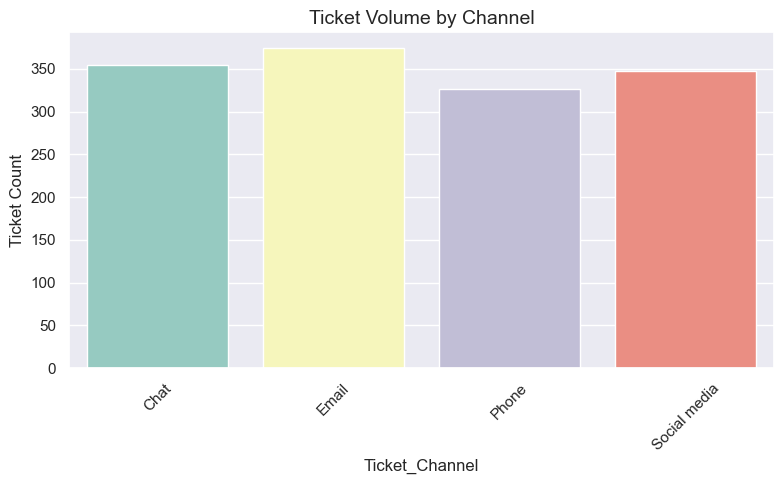

In [16]:
# Plot 3: Ticket Volume by Channel
plt.figure(figsize=(8, 5))
sns.countplot(x='Ticket_Channel', data=prepared_df, palette="Set3")
plt.title('Ticket Volume by Channel', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Ticket Count')
plt.tight_layout()
plt.show()


C:\Users\degarcia\AppData\Local\Temp\ipykernel_24408\854455190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ticket_Priority', data=prepared_df, palette="Set1")


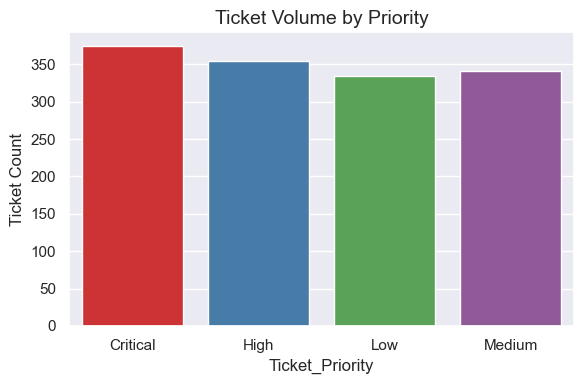

In [17]:
# Plot 4: Ticket Volume by Priority
plt.figure(figsize=(6, 4))
sns.countplot(x='Ticket_Priority', data=prepared_df, palette="Set1")
plt.title('Ticket Volume by Priority', fontsize=14)
plt.ylabel('Ticket Count')
plt.tight_layout()
plt.show()


### Resolution Time Summary

C:\Users\degarcia\AppData\Local\Temp\ipykernel_24408\4140562663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticket_Priority', y='Resolution_Time_Hours', data=prepared_df, palette="Set1")


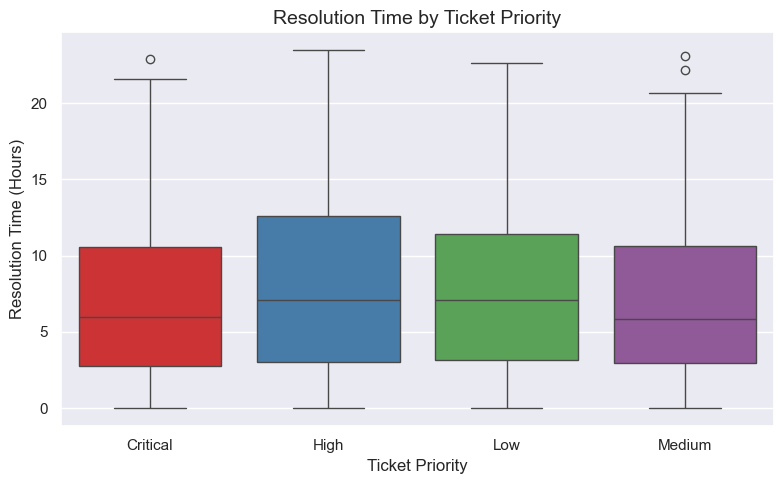

In [18]:
# Plot 5: Boxplot - Resolution Time by Ticket Priority
plt.figure(figsize=(8, 5))
sns.boxplot(x='Ticket_Priority', y='Resolution_Time_Hours', data=prepared_df, palette="Set1")
plt.title('Resolution Time by Ticket Priority', fontsize=14)
plt.xlabel('Ticket Priority')
plt.ylabel('Resolution Time (Hours)')
plt.tight_layout()
plt.show()

In [23]:
# Quick summary of selected numeric columns
prepared_df[['Resolution_Time_Hours', 'Customer Satisfaction Rating', 'Customer Age']].describe()


,Resolution_Time_Hours,Customer Satisfaction Rating,Customer Age
count,1404.000000,1404.00000,1404.000000
mean,7.577932,3.02849,44.149573
std,5.596637,1.40025,15.218639
min,0.000000,1.00000,18.000000
25%,3.000000,2.00000,31.000000
50%,6.341667,3.00000,44.000000
75%,11.354167,4.00000,57.000000
max,23.466667,5.00000,70.000000


### Prepare Features for Modeling

In [19]:
# Encode Ticket Channel
df['Ticket Channel'] = df['Ticket Channel'].astype('category')
df['Channel_Code'] = df['Ticket Channel'].cat.codes

# Create binary satisfaction label
df['Satisfaction_Level'] = df['Customer Satisfaction Rating'].apply(
    lambda x: 1 if x >= 4 else (0 if pd.notnull(x) else None)
)
df.dropna(subset=['Satisfaction_Level'], inplace=True)


## 2.  **Importing Necessary Modules**

In [20]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### 1.1. Data Preparation

In [ ]:
# 1. Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Plot settings
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="whitegrid")


In [ ]:
# 2. Load the Data
df = pd.read_csv('customer_support_tickets.csv')

# First quick look
df.head()


In [ ]:
# 3. Data Understanding
print(df.info())
print(df.describe())
print(df.isnull().sum())


In [ ]:
# 4. Data Preparation
# Convert timestamps
df['Created Time'] = pd.to_datetime(df['Created Time'])
df['Resolved_Time'] = pd.to_datetime(df['Resolved_Time'])

# Calculate response and resolution times if needed
df['Response_Time_Hours'] = df['Response_Time'] / 3600  # assuming it's in seconds
df['Resolution_Time_Hours'] = (df['Resolved_Time'] - df['Created Time']).dt.total_seconds() / 3600

# Create time-based features
df['Hour'] = df['Created Time'].dt.hour
df['DayOfWeek'] = df['Created Time'].dt.dayofweek
df['Month'] = df['Created Time'].dt.month

# Encode categorical variables
df['Channel'] = df['Channel'].astype('category')
df['Channel_Code'] = df['Channel'].cat.codes

# Drop unnecessary columns (adjust based on data)
# df = df.drop(columns=['Ticket_ID', 'Customer_ID'], errors='ignore')


In [ ]:
# 5. Exploratory Data Analysis (EDA)

# Ticket volume by month
df.groupby('Month').size().plot(kind='bar')
plt.title('Tickets by Month')
plt.ylabel('Number of Tickets')
plt.show()

# Average satisfaction by channel
sns.barplot(x='Channel', y='Satisfaction_Score', data=df)
plt.title('Customer Satisfaction by Support Channel')
plt.xticks(rotation=45)
plt.show()

# Response time vs satisfaction
sns.scatterplot(x='Response_Time_Hours', y='Satisfaction_Score', data=df)
plt.title('Response Time vs Satisfaction')
plt.show()

# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# 6. Machine Learning Models

# Classification: Predict Satisfaction High/Low
df['Satisfaction_Level'] = np.where(df['Satisfaction_Score'] >= 4, 1, 0)

# Features and Target
X = df[['Response_Time_Hours', 'Resolution_Time_Hours', 'Channel_Code', 'Hour', 'DayOfWeek', 'Month']]
y = df['Satisfaction_Level']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# Metrics
print(classification_report(y_test, y_pred_rfc))
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
# 7. Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_rfc.fit(X_train, y_train)

print("Best Parameters:", grid_rfc.best_params_)
print("Best Cross-Val Score:", grid_rfc.best_score_)


In [ ]:
# 8. Forecasting Ticket Volumes

# Prepare for forecasting (group by date)
df['Date'] = df['Created Time'].dt.date
daily_tickets = df.groupby('Date').size().reset_index(name='Ticket_Count')

# Features
daily_tickets['DayOfWeek'] = pd.to_datetime(daily_tickets['Date']).dt.dayofweek
daily_tickets['Month'] = pd.to_datetime(daily_tickets['Date']).dt.month

X_forecast = daily_tickets[['DayOfWeek', 'Month']]
y_forecast = daily_tickets['Ticket_Count']

# Train-Test
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_forecast, y_forecast, test_size=0.2, random_state=42)

# Model
xgb_model = XGBRegressor()
xgb_model.fit(Xf_train, yf_train)
yf_pred = xgb_model.predict(Xf_test)

# Metrics
print("MAE:", mean_absolute_error(yf_test, yf_pred))
print("R²:", r2_score(yf_test, yf_pred))

# Plot actual vs predicted
plt.plot(yf_test.values, label='Actual')
plt.plot(yf_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Ticket Volumes')
plt.show()
